In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('../data/processed/MissingValuesHandled.csv')
df.head(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1 CHURN RATE

In [19]:
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100

print("Absolute Counts:")
print(churn_counts)
print("\nPercentages:")
for category, percentage in churn_percentages.items():
    print(f"{category}: {percentage:.2f}%")

churn_rate = churn_percentages['Yes']
print(f"\nOVERALL CHURN RATE: {churn_rate:.2f}%")

Absolute Counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentages:
No: 73.46%
Yes: 26.54%

OVERALL CHURN RATE: 26.54%


### 2. IMBALANCE RATIO

In [20]:
majority_class = churn_counts.max()
minority_class = churn_counts.min()
imbalance_ratio = majority_class / minority_class

print(f"Majority Class (No Churn): {majority_class:,} customers")
print(f"Minority Class (Churn): {minority_class:,} customers")
print(f"Imbalance Ratio: {imbalance_ratio:.2f}:1")

Majority Class (No Churn): 5,174 customers
Minority Class (Churn): 1,869 customers
Imbalance Ratio: 2.77:1


In [21]:
if imbalance_ratio < 1.5:
    balance_level = "Balanced"
elif imbalance_ratio < 3:
    balance_level = "Slightly Imbalanced"
elif imbalance_ratio < 10:
    balance_level = "Moderately Imbalanced"
else:
    balance_level = "Severely Imbalanced"


print(f"Dataset Classification: {balance_level}")

Dataset Classification: Slightly Imbalanced


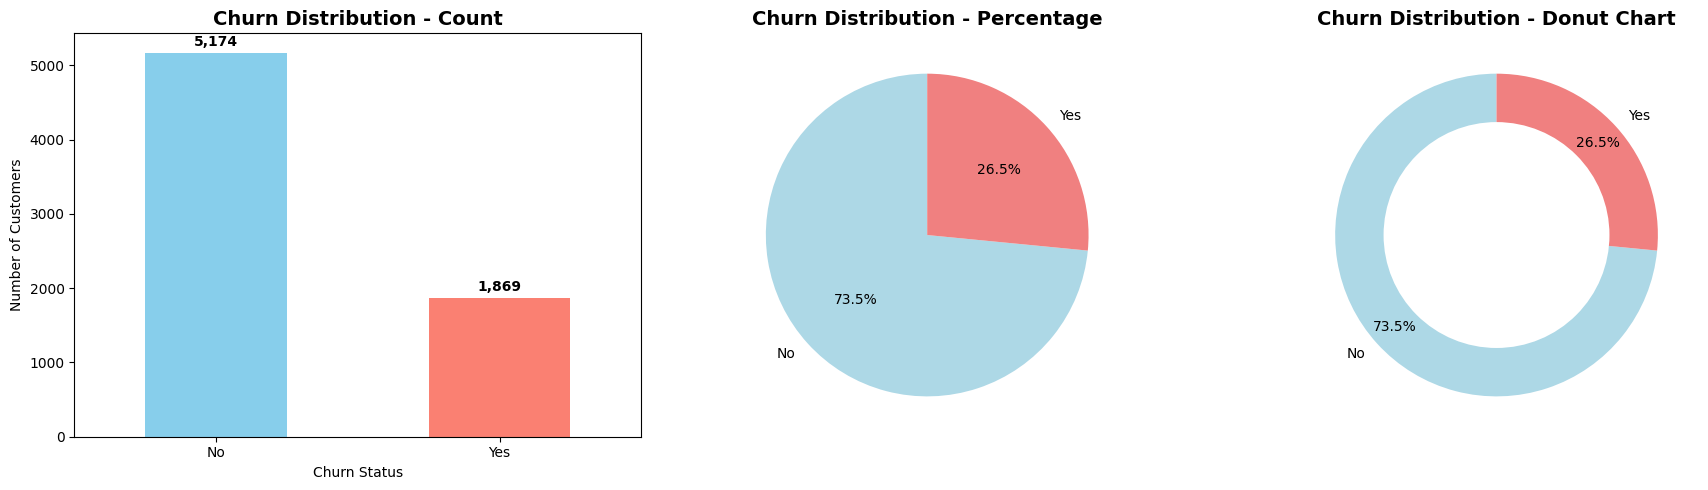

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar plot
churn_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'], rot=0)
axes[0].set_title('Churn Distribution - Count', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Churn Status')
axes[0].set_ylabel('Number of Customers')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
churn_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                  colors=['lightblue', 'lightcoral'], startangle=90)
axes[1].set_title('Churn Distribution - Percentage', fontweight='bold', fontsize=14)
axes[1].set_ylabel('')

# Donut chart for better visualization
wedges, texts, autotexts = axes[2].pie(churn_counts.values, labels=churn_counts.index,
                                       autopct='%1.1f%%', colors=['lightblue', 'lightcoral'],
                                       startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
axes[2].add_artist(centre_circle)
axes[2].set_title('Churn Distribution - Donut Chart', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()


### 3. BUSINESS IMPACT ANALYSIS

In [ ]:
total_customers = len(df)
churned_customers = churn_counts['Yes']
retained_customers = churn_counts['No']

print(f"Total Customer Base: {total_customers:,}")
print(f"Customers at Risk (Churned): {churned_customers:,}")
print(f"Retained Customers: {retained_customers:,}")

avg_monthly_charge = df['MonthlyCharges'].mean()
annual_revenue_loss = churned_customers * avg_monthly_charge * 12

print(f"\n💰 FINANCIAL IMPACT:")
print(f"Average Monthly Charge: ${avg_monthly_charge:.2f}")
print(f"Estimated Annual Revenue Loss: ${annual_revenue_loss:,.2f}")
print(f"Revenue Loss per Churned Customer (Annual): ${avg_monthly_charge * 12:.2f}")

Total Customer Base: 7,043
Customers at Risk (Churned): 1,869
Retained Customers: 5,174

💰 FINANCIAL IMPACT:
Average Monthly Charge: $64.76
Estimated Annual Revenue Loss: $1,452,475.24
Revenue Loss per Churned Customer (Annual): $777.14


### 4. MODEL EVALUATION IMPLICATIONS

In [27]:
print("Class Imbalance Impact on Model Performance:")
print(f"Accuracy Bias: A naive model predicting 'No Churn' for all customers")
print(f"would achieve {(retained_customers/total_customers)*100:.1f}% accuracy")
print(f"Risk: Model may be biased toward majority class (No Churn)")
print(f"Recommended Metrics: Precision, Recall, F1-Score, AUC-ROC")
print(f"Sampling Strategies: Consider SMOTE, undersampling, or class weights")

Class Imbalance Impact on Model Performance:
Accuracy Bias: A naive model predicting 'No Churn' for all customers
would achieve 73.5% accuracy
Risk: Model may be biased toward majority class (No Churn)
Recommended Metrics: Precision, Recall, F1-Score, AUC-ROC
Sampling Strategies: Consider SMOTE, undersampling, or class weights


In [28]:

if churn_rate > 20:
    priority = "HIGH - Immediate attention required"
elif churn_rate > 10:
    priority = "MEDIUM - Proactive retention needed"
else:
    priority = "LOW - Monitor and maintain"
    
print(f"Churn Rate Priority Level: {priority}")

Churn Rate Priority Level: HIGH - Immediate attention required


### 5. SEGMENTED ANALYSIS

In [29]:
segments_to_analyze = ['Contract', 'PaymentMethod', 'InternetService']

for segment in segments_to_analyze:
    if segment in df.columns:
        segment_churn = df.groupby(segment)['Churn'].apply(
            lambda x: (x == 'Yes').sum() / len(x) * 100
        ).sort_values(ascending=False)
        
        print(f"\n{segment} - Churn Rates:")
        for category, rate in segment_churn.items():
            print(f"  {category}: {rate:.1f}%")



Contract - Churn Rates:
  Month-to-month: 42.7%
  One year: 11.3%
  Two year: 2.8%

PaymentMethod - Churn Rates:
  Electronic check: 45.3%
  Mailed check: 19.1%
  Bank transfer (automatic): 16.7%
  Credit card (automatic): 15.2%

InternetService - Churn Rates:
  Fiber optic: 41.9%
  DSL: 19.0%
  No: 7.4%
